In [1]:
using CairoMakie
using Statistics

In [2]:
include("io_array.jl")

read_from_csv (generic function with 1 method)

In [3]:
input_std_grid = read_from_file("data//appendix//rounding_error_test//1_input_std_grid.txt")[:, 1]

xor_delay = 7

r2_Float64 = read_from_file("data//appendix//rounding_error_test//r2_N=200_rho=0.6_delay=$(xor_delay)_Float64.txt")[:, 1]
r2_Double64 = read_from_file("data//appendix//rounding_error_test//r2_N=200_rho=0.6_delay=$(xor_delay)_Double64.txt")[:, 1]
r2_Float128 = read_from_file("data//appendix//rounding_error_test//r2_N=200_rho=0.6_delay=$(xor_delay)_Float128.txt")[:, 1]

211-element Vector{Float64}:
 0.003032421829502731
 0.002230903196389423
 0.002004503570593435
 0.00214054411720831
 0.0029954509466589624
 0.0016728713555788758
 0.0019294894977017099
 0.001170284835913807
 0.0010281626285211
 0.0024388434821570023
 ⋮
 0.7093145734143628
 0.5184632921217792
 0.38247754063202966
 0.2854338893415709
 0.16130813040854083
 0.05431693898962435
 0.041468969927296345
 0.026434003092747748
 0.008611698412487361

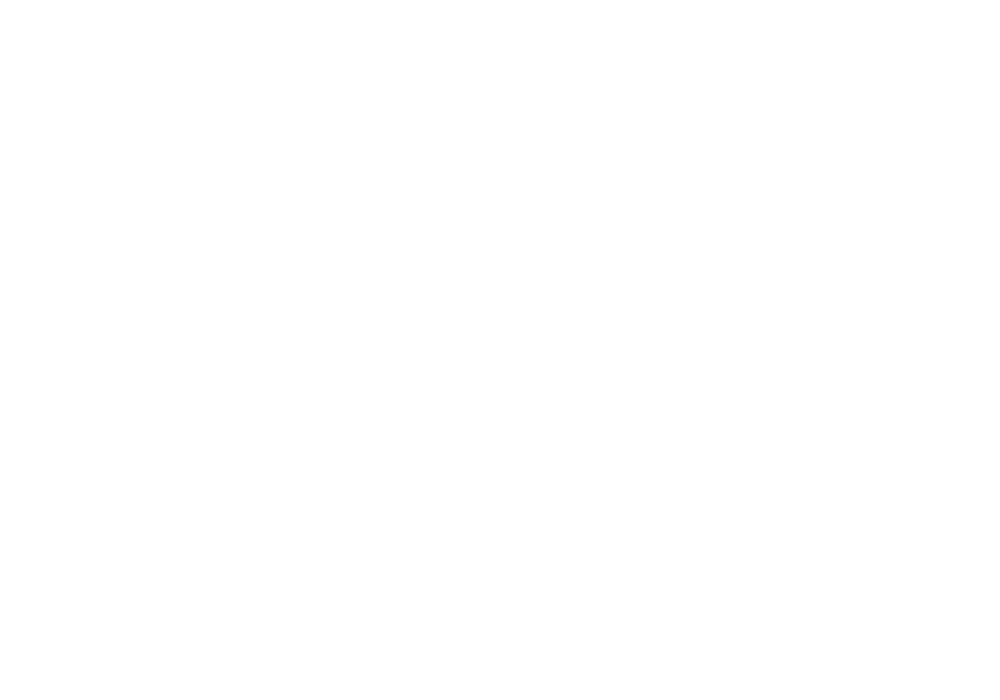

In [4]:
set_theme!(
    fontsize=20,
    Legend=(labelsize=20,),
    Axis=(
        xgridvisible=false,
        ygridvisible=false,
    ),
)

fig = Figure(size=(500, 350))

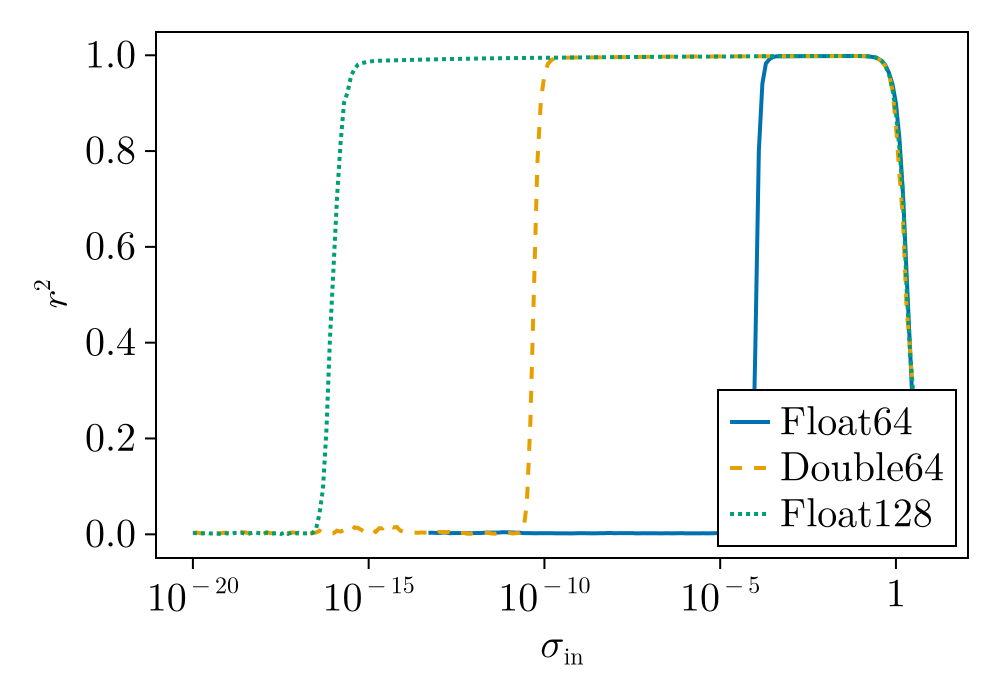

In [5]:
ax = Axis(fig[1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-20, 1e-15, 1e-10, 1e-5, 1], [L"10^{-20}", L"10^{-15}", L"10^{-10}", L"10^{-5}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]))

lines!(ax, input_std_grid, r2_Float64, label=L"\mathrm{Float64}", linewidth=2)
lines!(ax, input_std_grid, r2_Double64, label=L"\mathrm{Double64}", linewidth=2, linestyle=:dash)
lines!(ax, input_std_grid, r2_Float128, label=L"\mathrm{Float128}", linewidth=2, linestyle=(:dot, :dense))

axislegend(ax; position=:rb)

fig

In [6]:
save("fig9_rounding_error.pdf", fig)

CairoMakie.Screen{PDF}
